# **1.0 IMPORTING THE DATASET**

**1.1 Mounting the drive in the colab and importing the librarires**



In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# mounting the drive 

from google.colab import drive
drive.mount('/content/gdrive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


**1.2 Loading the dataset from the drive**

In [ ]:
data = pd.read_csv("/content/gdrive/My Drive/dataset.csv")

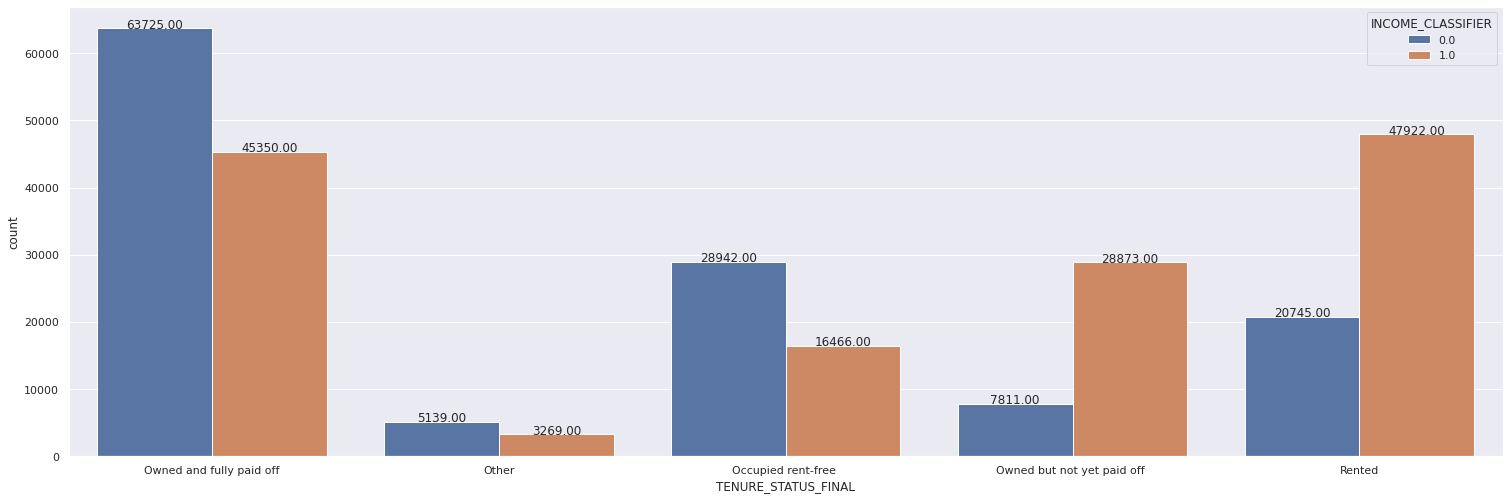

In [ ]:
sns.set(rc={'figure.figsize':(25.7,8.27)}) 
ax = sns.countplot(x='TENURE_STATUS_FINAL', hue='INCOME_CLASSIFIER', data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 


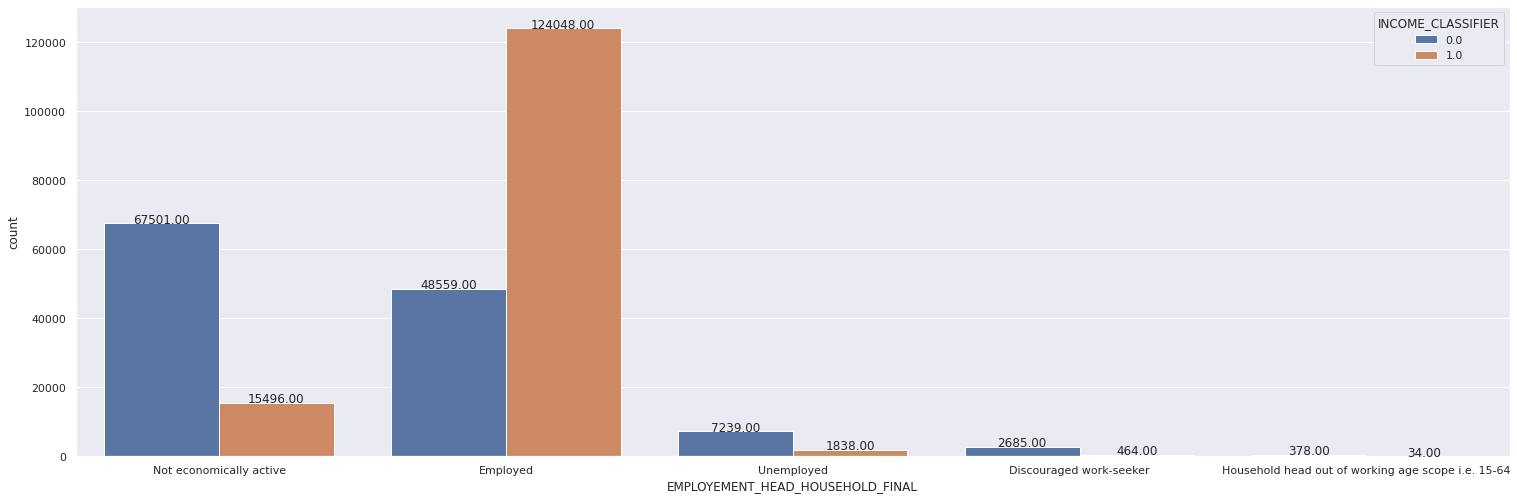

In [ ]:
sns.set(rc={'figure.figsize':(25.7,8.27)}) 
ax = sns.countplot(x='EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL', hue='INCOME_CLASSIFIER', data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 

# **2.0 Exploring The Dataset**

In [ ]:
data.head()

,SN_ID,TYPE_LIVING_QUARTERS,TOTAL_NUM_ROOMS,TENURE_STATUS_FINAL,ACCESS_TO_TOILET_FINAL,ACCESS_TO_PIPE_WATER_FINAL,OWN_COMPUTER,OWN_TV,FAVORITE_NUMBER,INTERNET_ACCESS_FINAL,AGE_HEAD_OF_HOUSEHOLD,HEAD_OF_HOUSEHOLD,EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL,EMPTY_COLUMN,HOUSE_HOLD_SIZE,HOUSEHOLD_SIZE,NUM_CHILD_IN_HOUSEHOLD,INCOME_CLASSIFIER
0,1.194173e+10,House,4.0,Owned and fully paid off,Flush toilet with septic tank,Piped tap water inside the dwelling,Y,Y,8.0,From home,70.0,Female,Not economically active,NaN,1.0,1.0,0.0,1.0
1,1.112072e+10,House,6.0,Owned and fully paid off,Flush toilet connected to sewerage system,Piped tap water inside the dwelling,N,Y,2.0,No access to internet,NaN,Female,Employed,NaN,6.0,6.0,4.0,0.0
2,1.050598e+10,House,5.0,Owned and fully paid off,Flush toilet connected to sewerage system,Piped tap water inside the dwelling,N,Y,14.0,No access to internet,74.0,Female,Not economically active,NaN,3.0,3.0,2.0,1.0
3,1.019185e+10,House,2.0,Other,Flush toilet connected to sewerage system,Piped tap water inside the yard,N,Y,9.0,No access to internet,31.0,Male,Employed,NaN,3.0,3.0,1.0,1.0
4,1.198568e+10,House,2.0,Occupied rent-free,Flush toilet connected to sewerage system,Piped tap water inside the dwelling,N,Y,8.0,From cell phone,39.0,Female,Employed,NaN,3.0,3.0,1.0,0.0


In [ ]:
data = data.drop(labels='EMPTY_COLUMN',axis=1)

In [ ]:
data.isnull().sum()

SN_ID                                   9
TYPE_LIVING_QUARTERS                    9
TOTAL_NUM_ROOMS                         9
TENURE_STATUS_FINAL                     9
ACCESS_TO_TOILET_FINAL              11405
ACCESS_TO_PIPE_WATER_FINAL              9
OWN_COMPUTER                            9
OWN_TV                                  9
FAVORITE_NUMBER                         9
INTERNET_ACCESS_FINAL                   9
AGE_HEAD_OF_HOUSEHOLD               51143
HEAD_OF_HOUSEHOLD                       9
EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL        9
HOUSE_HOLD_SIZE                         9
HOUSEHOLD_SIZE                          9
NUM_CHILD_IN_HOUSEHOLD                  9
INCOME_CLASSIFIER                       9
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268251 entries, 0 to 268250
Data columns (total 17 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   SN_ID                             268242 non-null  float64
 1   TYPE_LIVING_QUARTERS              268242 non-null  object 
 2   TOTAL_NUM_ROOMS                   268242 non-null  float64
 3   TENURE_STATUS_FINAL               268242 non-null  object 
 4   ACCESS_TO_TOILET_FINAL            256846 non-null  object 
 5   ACCESS_TO_PIPE_WATER_FINAL        268242 non-null  object 
 6   OWN_COMPUTER                      268242 non-null  object 
 7   OWN_TV                            268242 non-null  object 
 8   FAVORITE_NUMBER                   268242 non-null  float64
 9   INTERNET_ACCESS_FINAL             268242 non-null  object 
 10  AGE_HEAD_OF_HOUSEHOLD             217108 non-null  float64
 11  HEAD_OF_HOUSEHOLD                 268242 non-null  o

**Notes** 

As there are two same coolumns of same values named Houshold_size

In [ ]:
data = data.drop(labels='HOUSEHOLD_SIZE',axis=1) 

**2.1 Dealing with the missing values**

visvaliizinng the missing values 

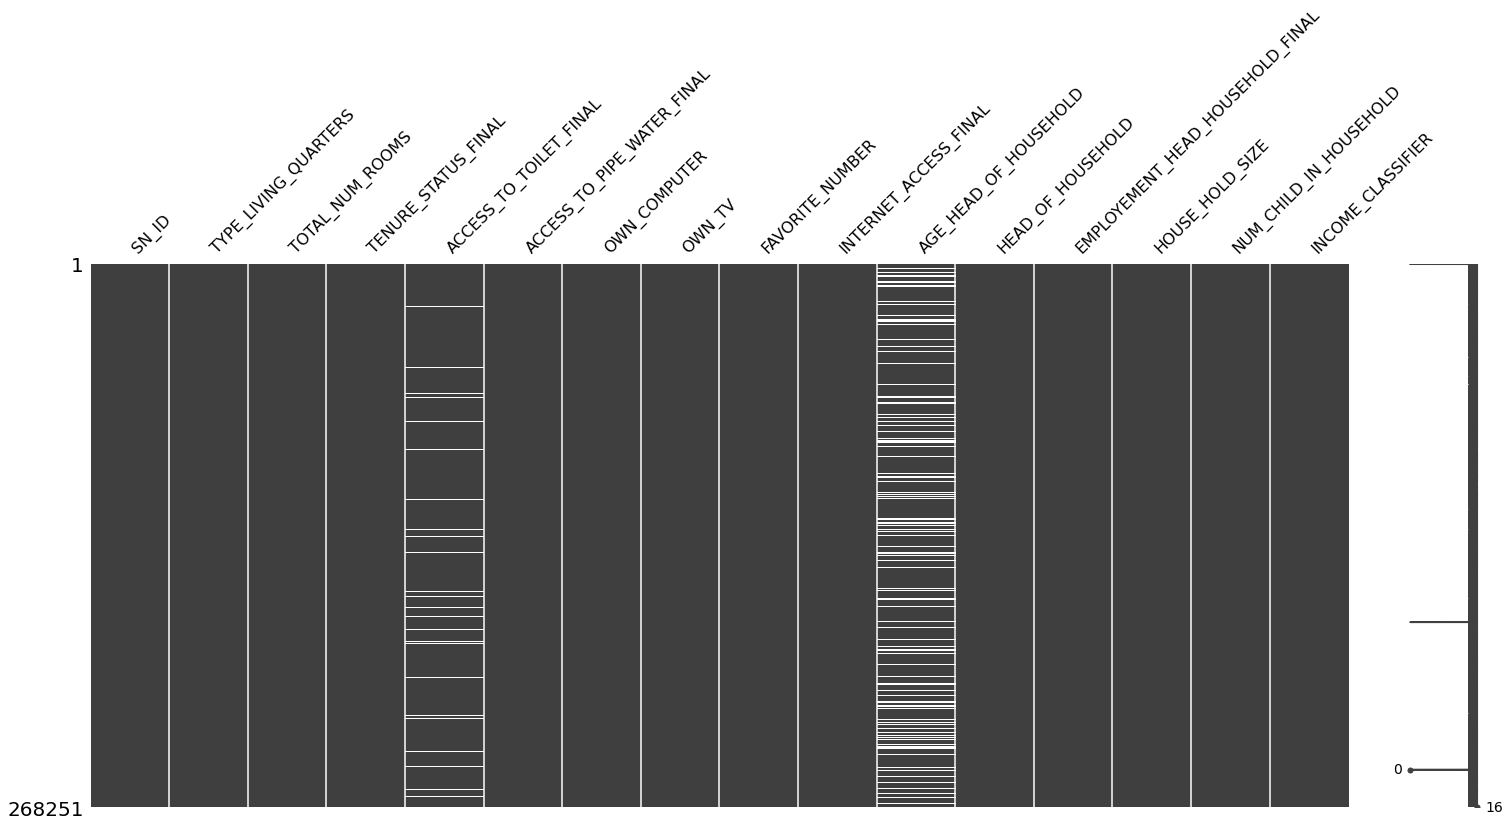

In [ ]:
import missingno as mn
mn.matrix(data)

---
NOTES 
---
1) first Remove all the columns in which the the income classifier is nan 

2) After that Remove the null values in the Age of head can be done  by taking the average 

3) At last acess to toilet can be assigned as a new class or value as it could  reflect there mantility that they dont want to tell about that what type of toliet theuy use which can effect there maintality  

In [ ]:
for i in range (len(data)) :
  if data['INCOME_CLASSIFIER'][i] != 0 and data['INCOME_CLASSIFIER'][i] != 1 : 
    data = data.drop(i,axis=0)


In [ ]:
data.isnull().sum()

SN_ID                                   0
TYPE_LIVING_QUARTERS                    0
TOTAL_NUM_ROOMS                         0
TENURE_STATUS_FINAL                     0
ACCESS_TO_TOILET_FINAL              11396
ACCESS_TO_PIPE_WATER_FINAL              0
OWN_COMPUTER                            0
OWN_TV                                  0
FAVORITE_NUMBER                         0
INTERNET_ACCESS_FINAL                   0
AGE_HEAD_OF_HOUSEHOLD               51134
HEAD_OF_HOUSEHOLD                       0
EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL        0
HOUSE_HOLD_SIZE                         0
NUM_CHILD_IN_HOUSEHOLD                  0
INCOME_CLASSIFIER                       0
dtype: int64

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy ='mean')
l=data.iloc[:,10:11].values
imputer.fit(l)
data['AGE_HEAD_OF_HOUSEHOLD']=imputer.transform(l)

In [ ]:
data.isnull().sum()

SN_ID                                   0
TYPE_LIVING_QUARTERS                    0
TOTAL_NUM_ROOMS                         0
TENURE_STATUS_FINAL                     0
ACCESS_TO_TOILET_FINAL              11396
ACCESS_TO_PIPE_WATER_FINAL              0
OWN_COMPUTER                            0
OWN_TV                                  0
FAVORITE_NUMBER                         0
INTERNET_ACCESS_FINAL                   0
AGE_HEAD_OF_HOUSEHOLD                   0
HEAD_OF_HOUSEHOLD                       0
EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL        0
HOUSE_HOLD_SIZE                         0
NUM_CHILD_IN_HOUSEHOLD                  0
INCOME_CLASSIFIER                       0
dtype: int64

In [ ]:
data['ACCESS_TO_TOILET_FINAL'] = data['ACCESS_TO_TOILET_FINAL'].fillna('not known')

In [ ]:
data.isnull().sum()

SN_ID                               0
TYPE_LIVING_QUARTERS                0
TOTAL_NUM_ROOMS                     0
TENURE_STATUS_FINAL                 0
ACCESS_TO_TOILET_FINAL              0
ACCESS_TO_PIPE_WATER_FINAL          0
OWN_COMPUTER                        0
OWN_TV                              0
FAVORITE_NUMBER                     0
INTERNET_ACCESS_FINAL               0
AGE_HEAD_OF_HOUSEHOLD               0
HEAD_OF_HOUSEHOLD                   0
EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL    0
HOUSE_HOLD_SIZE                     0
NUM_CHILD_IN_HOUSEHOLD              0
INCOME_CLASSIFIER                   0
dtype: int64

**2.2 Checking the Data Imbalance** 

In [ ]:
data.describe()

,SN_ID,TOTAL_NUM_ROOMS,FAVORITE_NUMBER,AGE_HEAD_OF_HOUSEHOLD,HOUSE_HOLD_SIZE,NUM_CHILD_IN_HOUSEHOLD,INCOME_CLASSIFIER
count,2.682420e+05,268242.000000,268242.000000,268242.000000,268242.000000,268242.000000,268242.000000
mean,1.101111e+10,4.331175,9.991739,47.822531,3.482997,1.977435,0.528925
std,6.265965e+08,2.404639,6.058603,14.873262,2.339105,1.907772,0.499164
min,1.000000e+10,1.000000,0.000000,10.000000,1.000000,0.000000,0.000000
25%,1.046374e+10,2.000000,5.000000,37.000000,2.000000,1.000000,0.000000
50%,1.098558e+10,4.000000,10.000000,47.822531,3.000000,1.000000,1.000000
75%,1.151584e+10,6.000000,15.000000,56.000000,5.000000,3.000000,1.000000
max,1.224999e+10,20.000000,20.000000,111.000000,30.000000,21.000000,1.000000


NOTE

There is no class imbalance in the data but there is diffrence between the data value so it should be normalize 

**2.3 creating a new column as nuumber of adults in family**

In [ ]:
data['NUM_ADULT_IN_HOUSEHOLD'] = data['HOUSE_HOLD_SIZE']-data['NUM_CHILD_IN_HOUSEHOLD'] 

# **3.0 Visvalization Relation between diffrent columns**

**3.1 Relationship between favorite number and encome status**

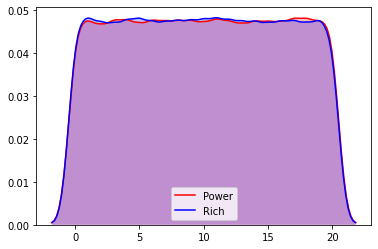

In [ ]:
sns.kdeplot(data.loc[(data['INCOME_CLASSIFIER']==0),'FAVORITE_NUMBER'],color='r',shade=True,label='Power')
sns.kdeplot(data.loc[(data['INCOME_CLASSIFIER']==1),'FAVORITE_NUMBER'],color='b',shade=True,label='Rich')

As the Favorite Number has no effect on the Income so it is benifitial to remove that 

In [ ]:
data  = data.drop(labels='FAVORITE_NUMBER' , axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268242 entries, 0 to 268250
Data columns (total 16 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   SN_ID                             268242 non-null  float64
 1   TYPE_LIVING_QUARTERS              268242 non-null  object 
 2   TOTAL_NUM_ROOMS                   268242 non-null  float64
 3   TENURE_STATUS_FINAL               268242 non-null  object 
 4   ACCESS_TO_TOILET_FINAL            268242 non-null  object 
 5   ACCESS_TO_PIPE_WATER_FINAL        268242 non-null  object 
 6   OWN_COMPUTER                      268242 non-null  object 
 7   OWN_TV                            268242 non-null  object 
 8   INTERNET_ACCESS_FINAL             268242 non-null  object 
 9   AGE_HEAD_OF_HOUSEHOLD             268242 non-null  float64
 10  HEAD_OF_HOUSEHOLD                 268242 non-null  object 
 11  EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL  268242 non-null  o

**3.2 Visvalization of relationship between type of living quater and economic status**

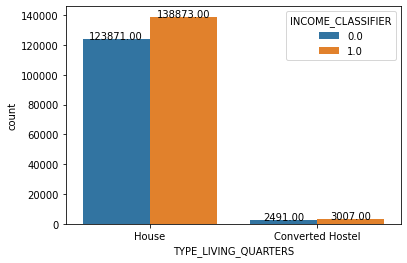

In [ ]:
ax = sns.countplot(x='TYPE_LIVING_QUARTERS', hue='INCOME_CLASSIFIER', data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 


**NOTE** 

1) As the 52 percent of people living in the houses are economically active and 54 percent oof people in converted hostel are active 

2) Instead of these to be similar to each other we cant remove them as they are depend on the number oof rooms in the house or converted hostel 


**3.3Visvalization of relationship between type of toilet and economic status** 

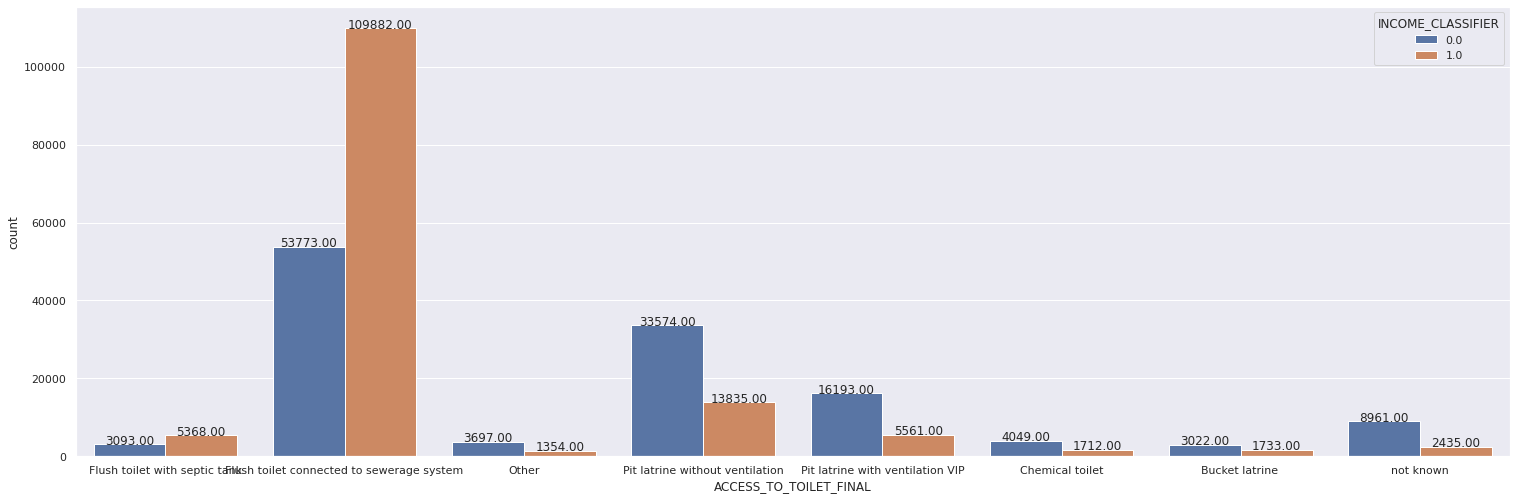

In [ ]:
sns.set(rc={'figure.figsize':(25.7,8.27)})   # for increasing the size of plot 

ax = sns.countplot(x='ACCESS_TO_TOILET_FINAL', hue='INCOME_CLASSIFIER', data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 

**Note** 

As It could be observved that the ratio is diffrent for all of these. So  It is impotant ot put them in this and also the people who were missing has diffrent ratio than all other so it is significnat to put them in diffrent class 

**3.4 Visvalization of relationship between number of roooms and economic status**

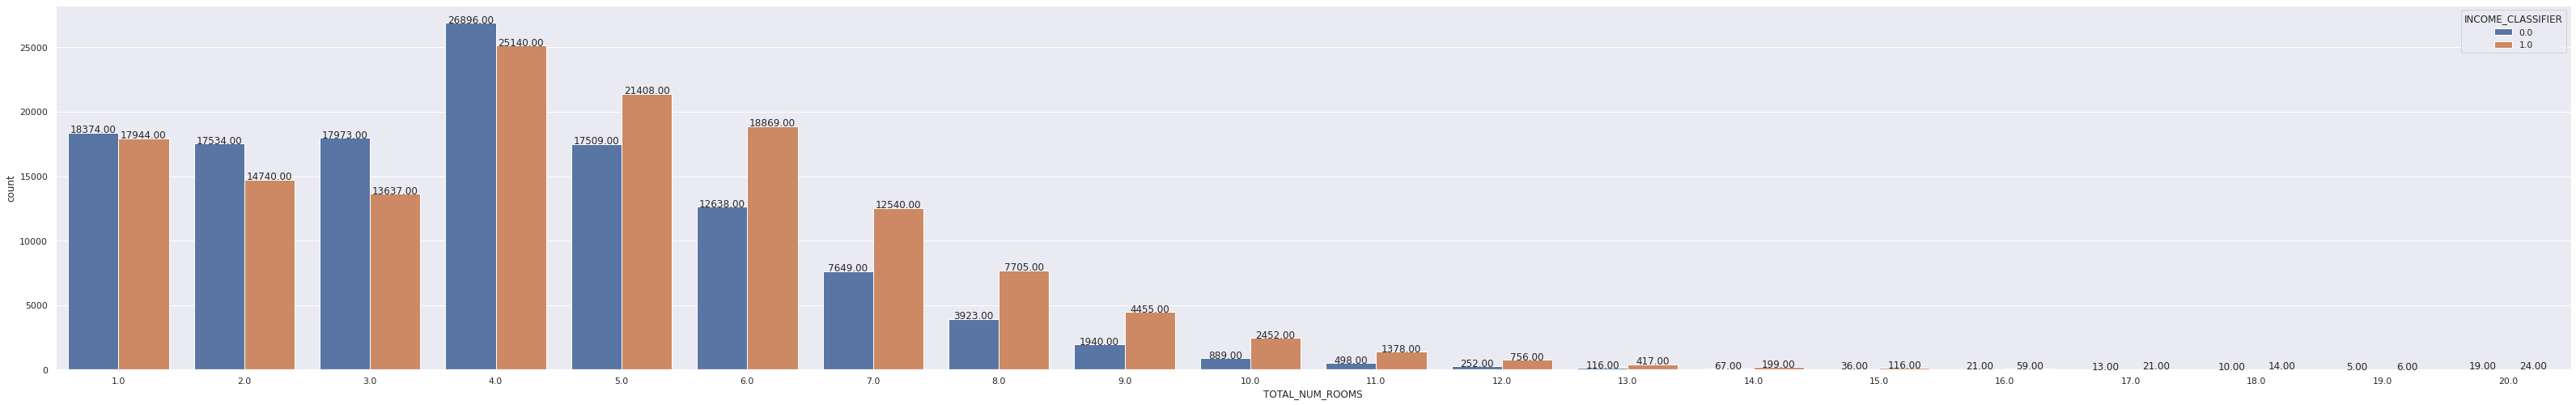

In [ ]:
sns.set(rc={'figure.figsize':(55.7,8.27)})   # for increasing the size of plot 

ax = sns.countplot(x='TOTAL_NUM_ROOMS', hue='INCOME_CLASSIFIER', data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 

**Note**

1) As it could be observed that as the size of home iincrease the the economoc  activity icerases but as an expection the housee with one room    that may be due to as it could be on rent or the people are outside and are here on work 

2) the data above 16 is very less so mix them 

In [ ]:
l =[18,60,89,278,176914,176928,176962,249675,249691]
for i in range (len(data)) :
  if i not in l :
    if data['TOTAL_NUM_ROOMS'][i] > 16 :
      data['TOTAL_NUM_ROOMS'][i] = 16 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


**3.4 Visvalization of relationship between ACCESS TO PIPE WATER FINAL and economic status**

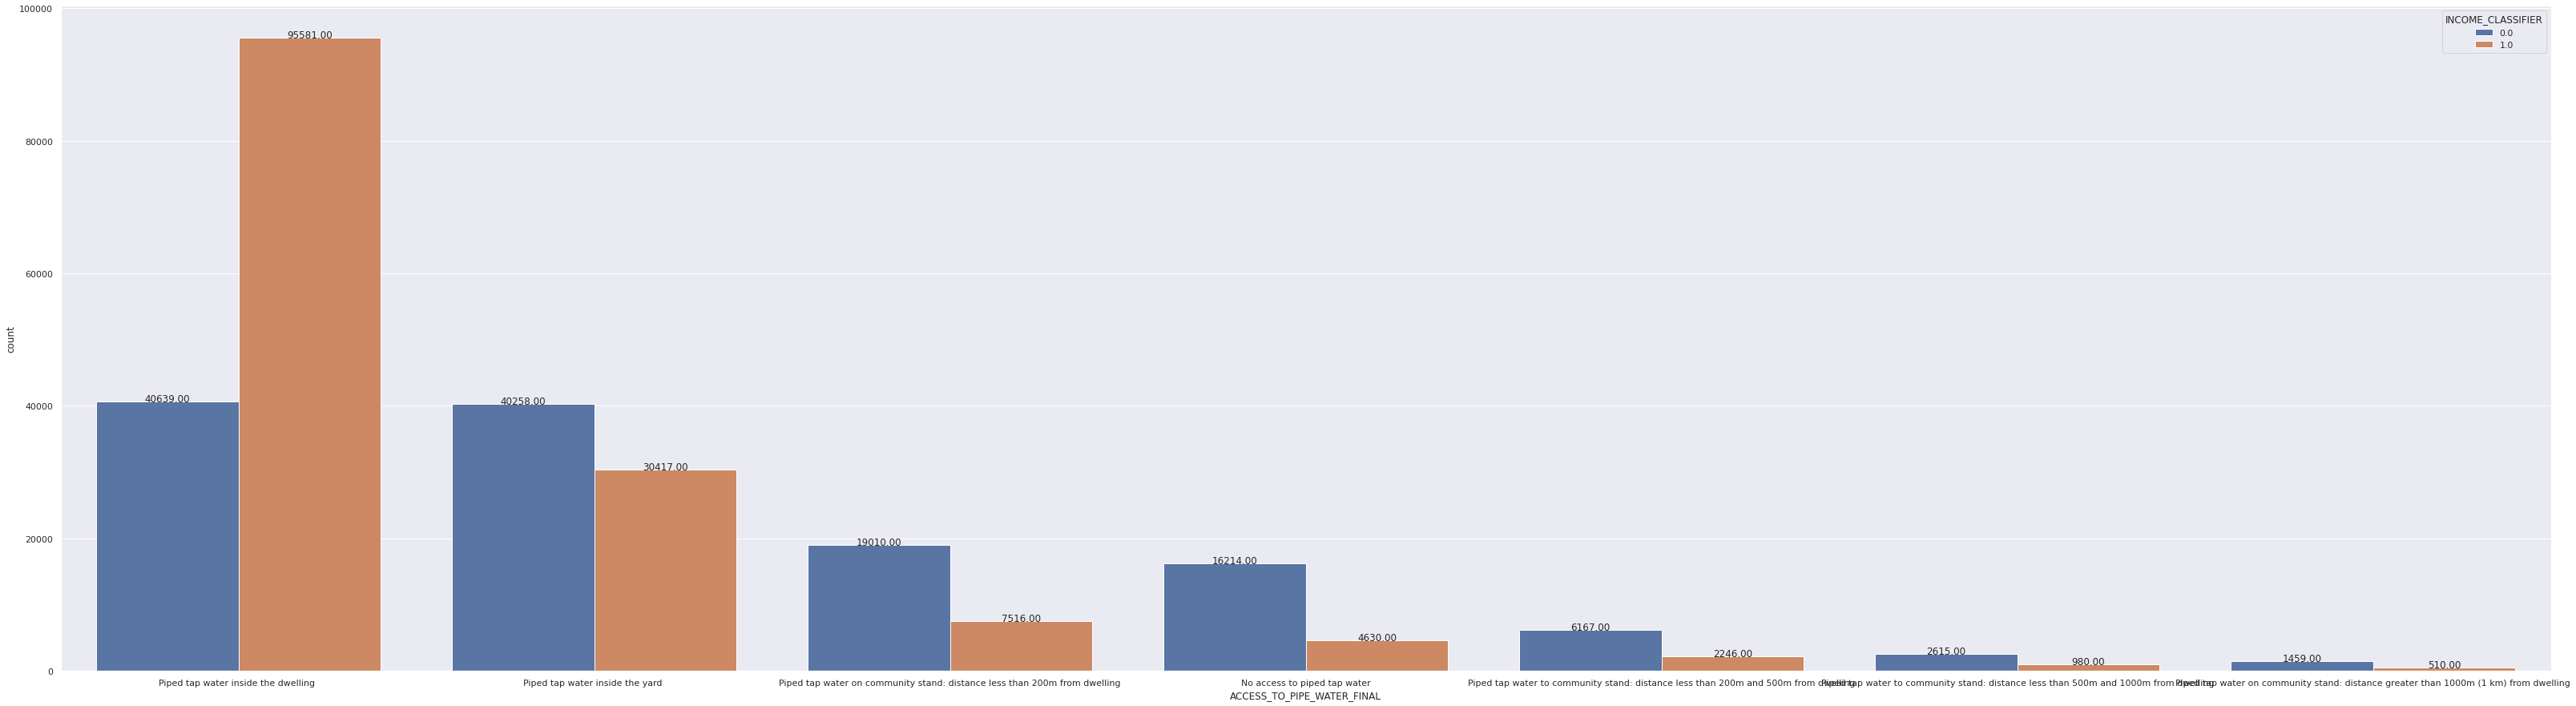

In [ ]:
sns.set(rc={'figure.figsize':(55.7,15.27)})   # for increasing the size of plot 

ax = sns.countplot(x='ACCESS_TO_PIPE_WATER_FINAL', hue='INCOME_CLASSIFIER', data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 

**3.5 Exploring the data of Own computer and Own TV**

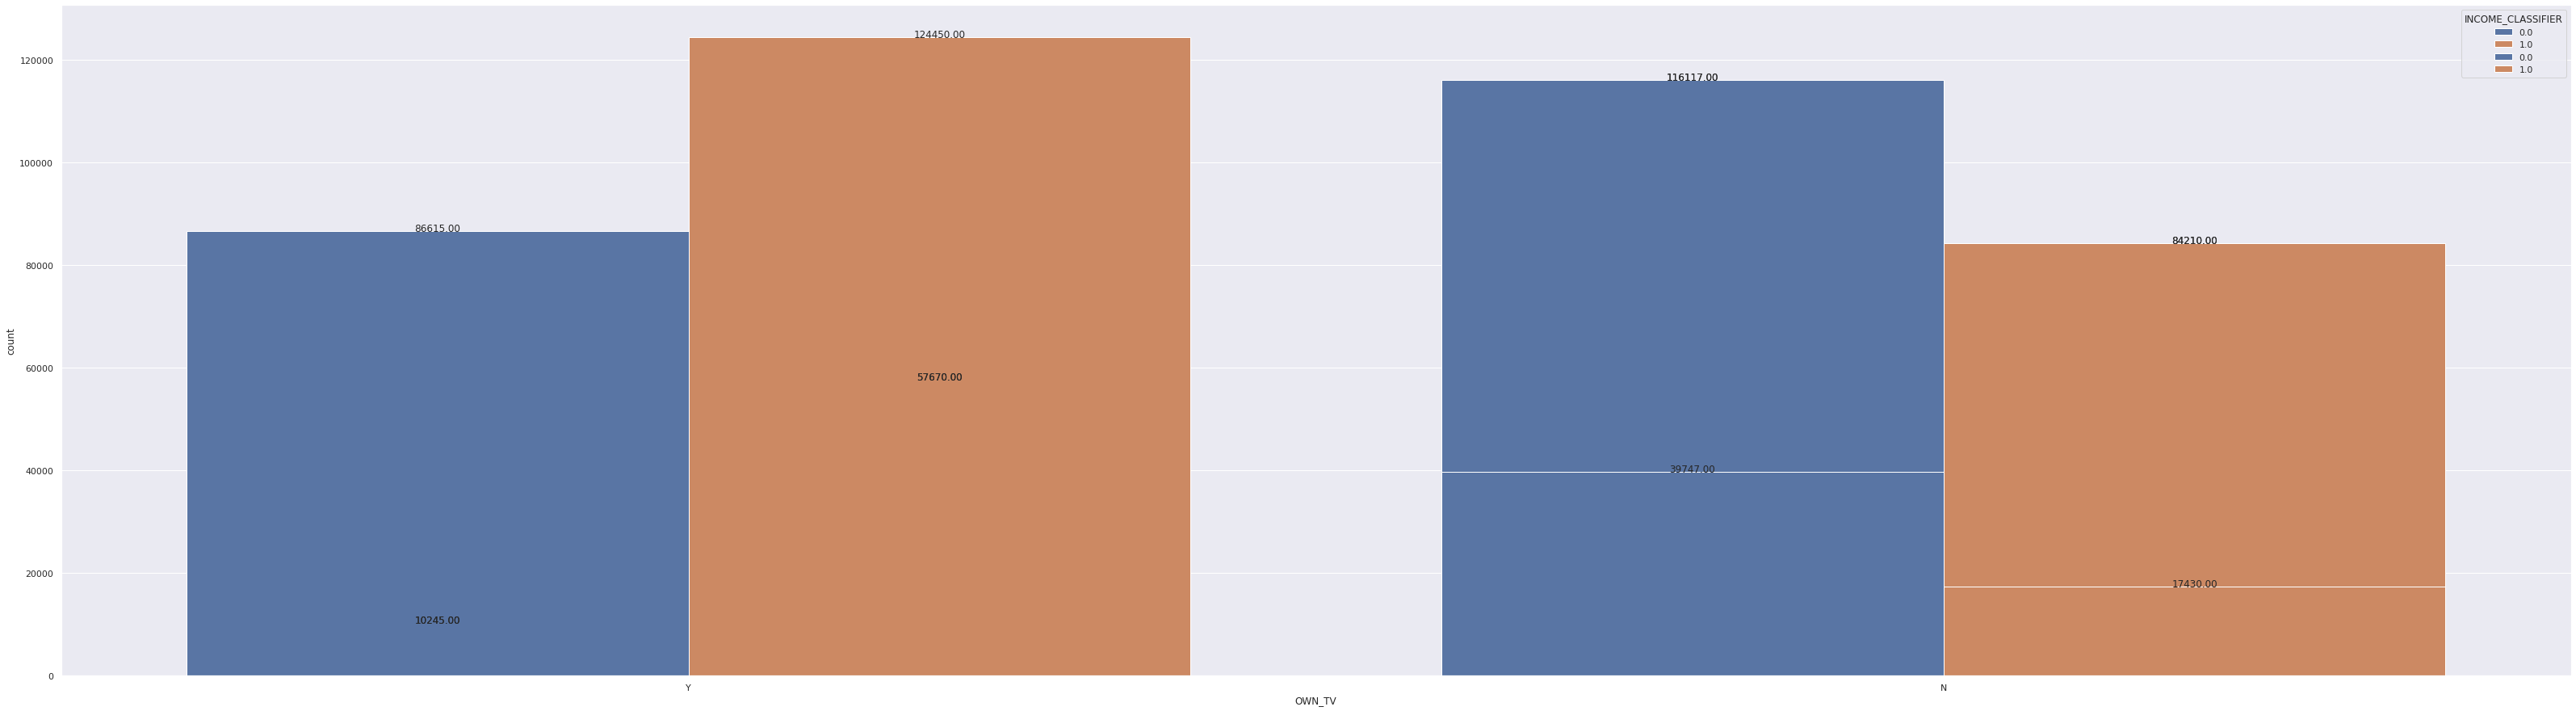

In [ ]:

sns.set(rc={'figure.figsize':(55.7,15.27)})   # for increasing the size of plot 

ax = sns.countplot(x='OWN_COMPUTER', hue='INCOME_CLASSIFIER', data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 

ax1 = sns.countplot(x='OWN_TV', hue='INCOME_CLASSIFIER', data=data)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 


**NOTES** 

1) Both TV and computer have similar effect on the economic status of a person If they have it than it is more chanceful that they are going to have economically active 

2) Also converting Y and N to 0 or 1 

In [ ]:
data = pd.get_dummies(data, columns=["OWN_COMPUTER","OWN_TV"],drop_first=True)

**3.6 Exploring the data of having access to internet or not**

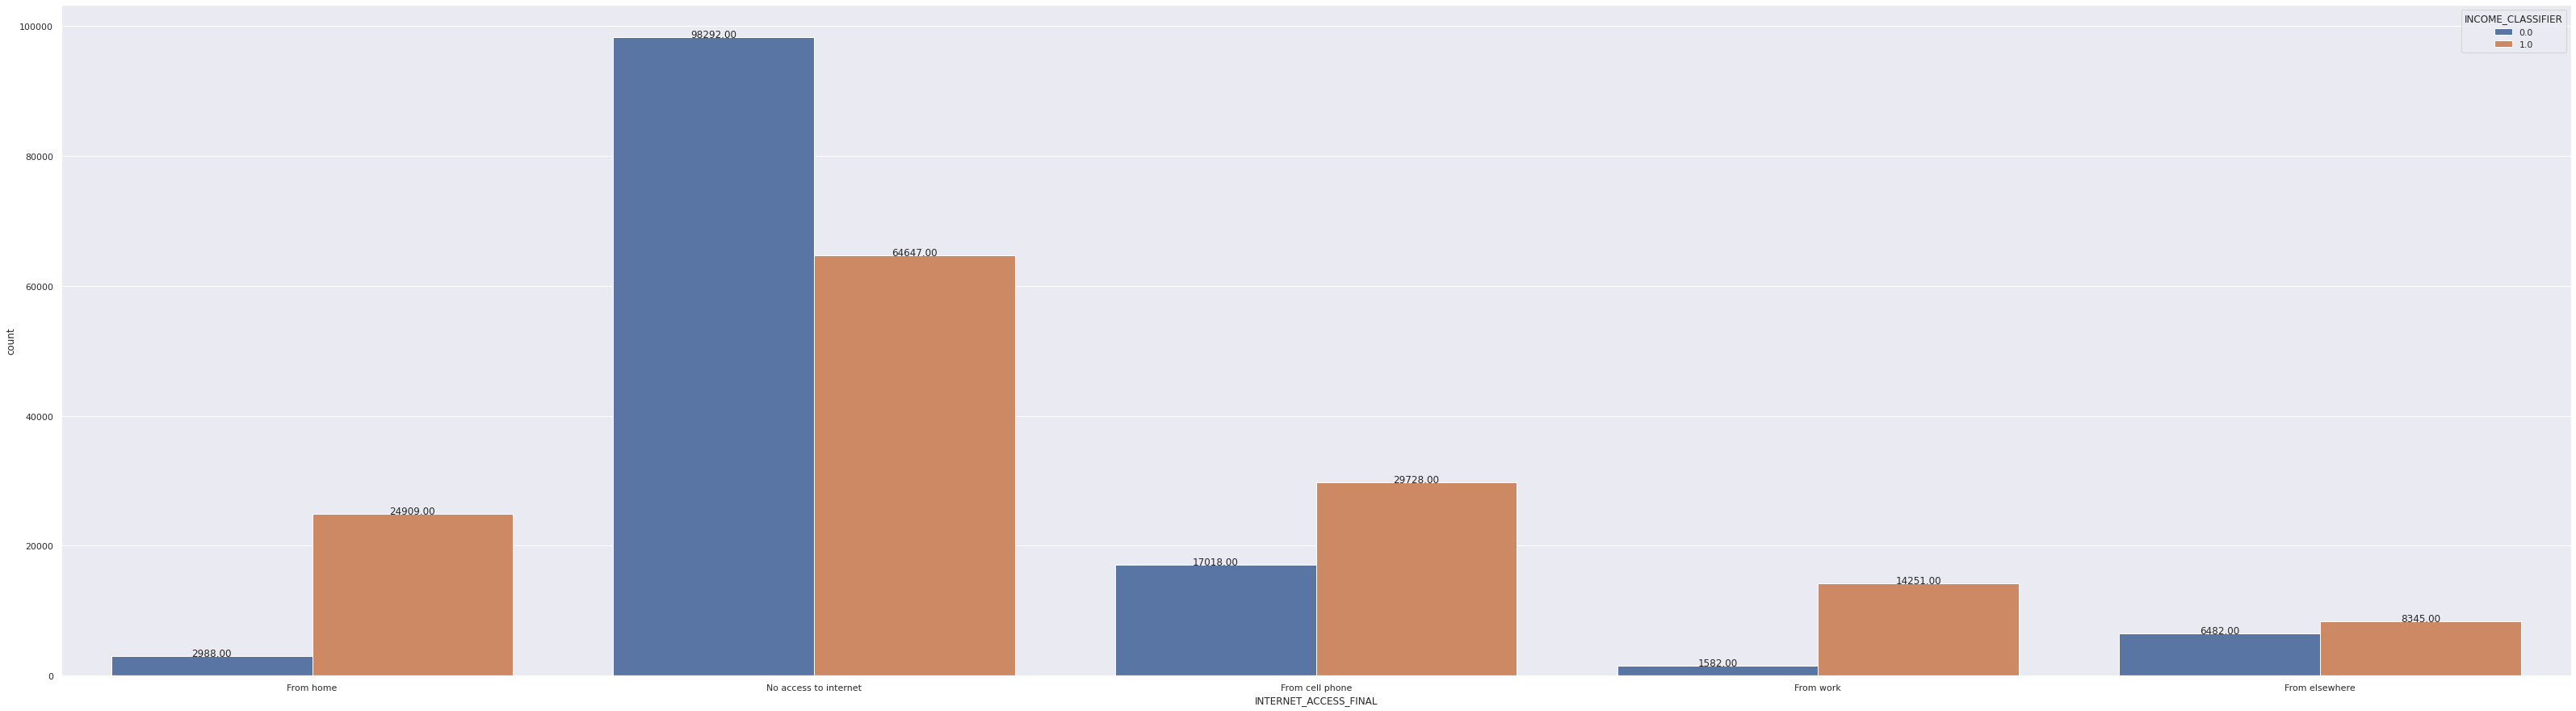

In [ ]:
sns.set(rc={'figure.figsize':(55.7,15.27)})   # for increasing the size of plot 

ax = sns.countplot(x='INTERNET_ACCESS_FINAL', hue='INCOME_CLASSIFIER', data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 

Here all catagories have thier own sgnificance so we cant mix them and each have a resanable number ofpeople **But if someone has internet than it is a symbol of more economic ativity**

**3.6 Exploring the data of thier age of thier family head**

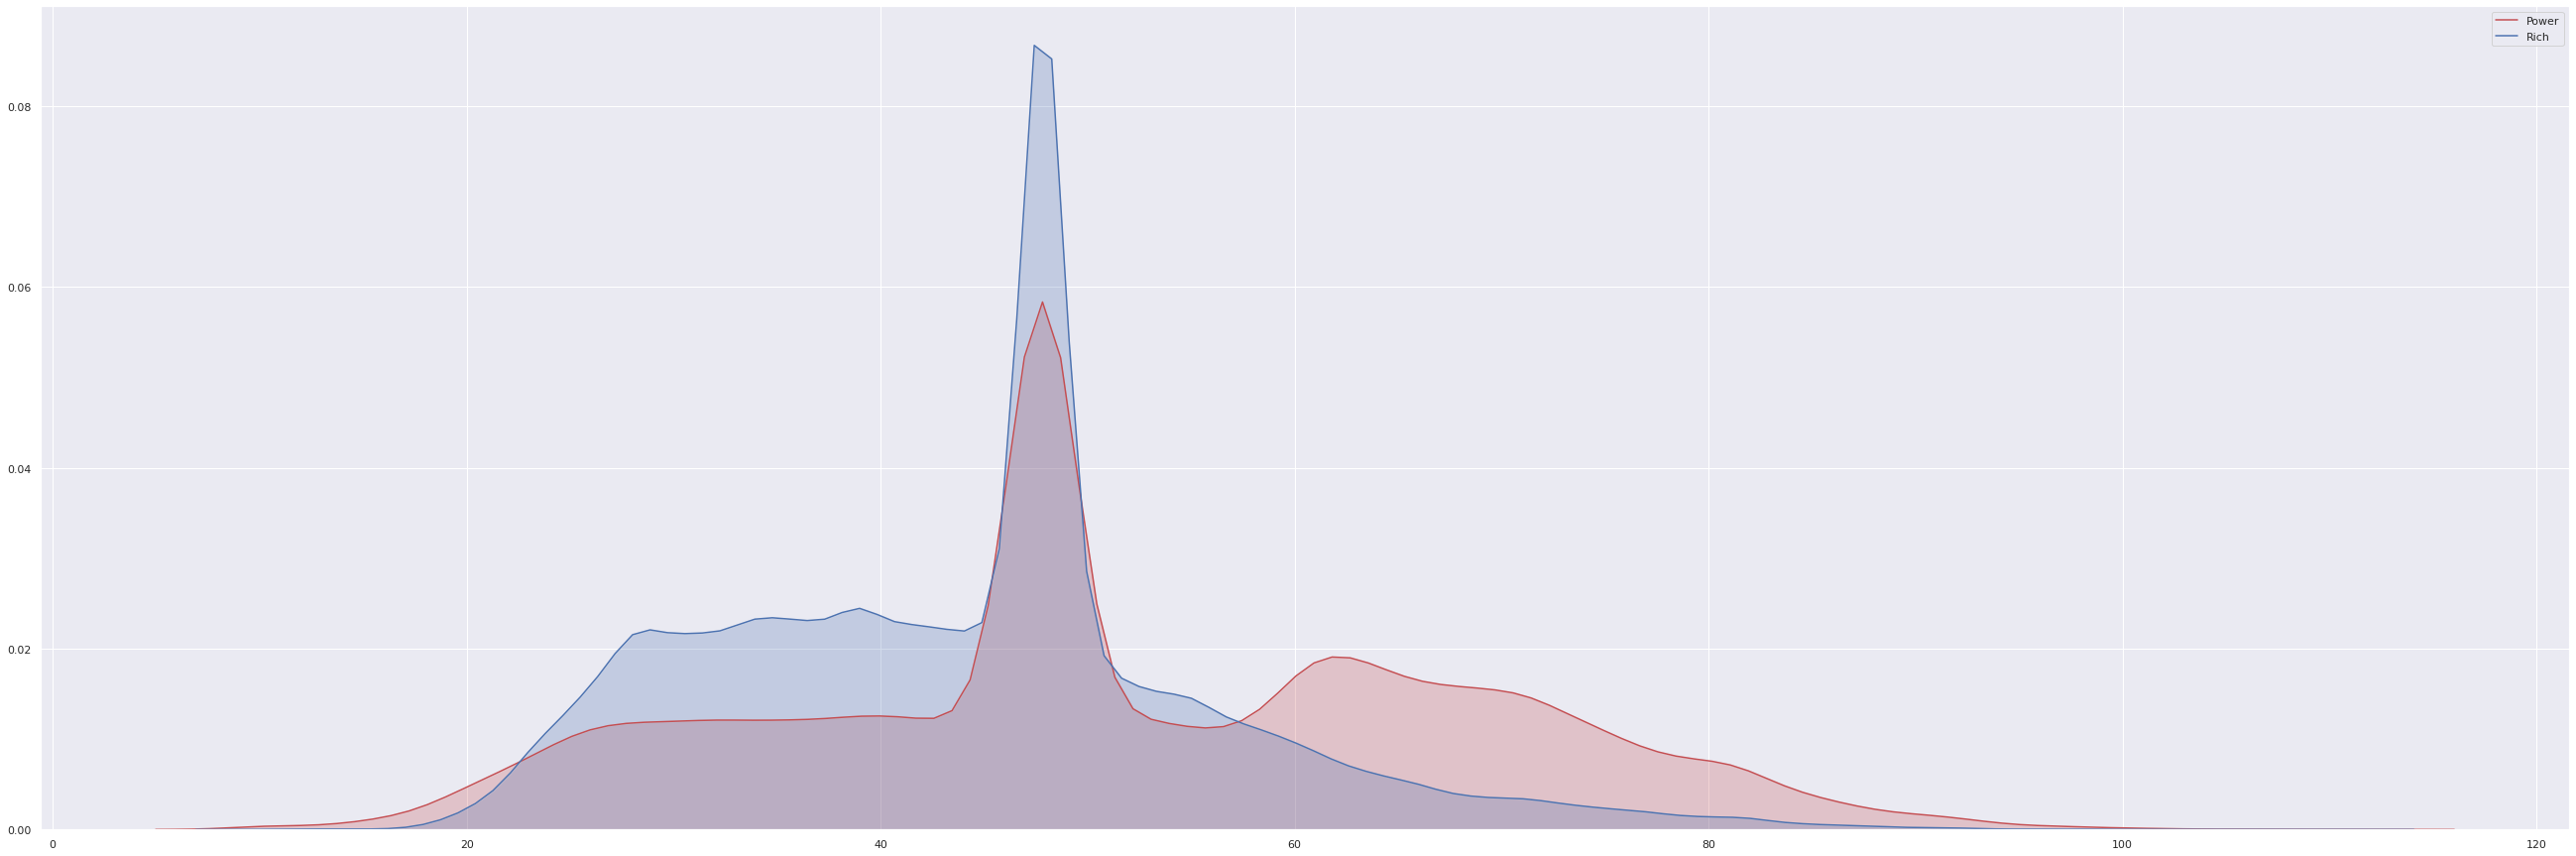

In [ ]:
sns.set(rc={'figure.figsize':(45.7,15.27)})
sns.kdeplot(data.loc[(data['INCOME_CLASSIFIER']==0),'AGE_HEAD_OF_HOUSEHOLD'],color='r',shade=True,label='Power')
sns.kdeplot(data.loc[(data['INCOME_CLASSIFIER']==1),'AGE_HEAD_OF_HOUSEHOLD'],color='b',shade=True,label='Rich')

**NOTES** 

1) As the family head is younger(20 years to 50 years) it is more chance that family is more active whear as if he is more old or young it is more chance that theyy are not family active 

2) most of the family have there family head as 40 to 55 years 

**3.6 Exploring the data of gender of family head**

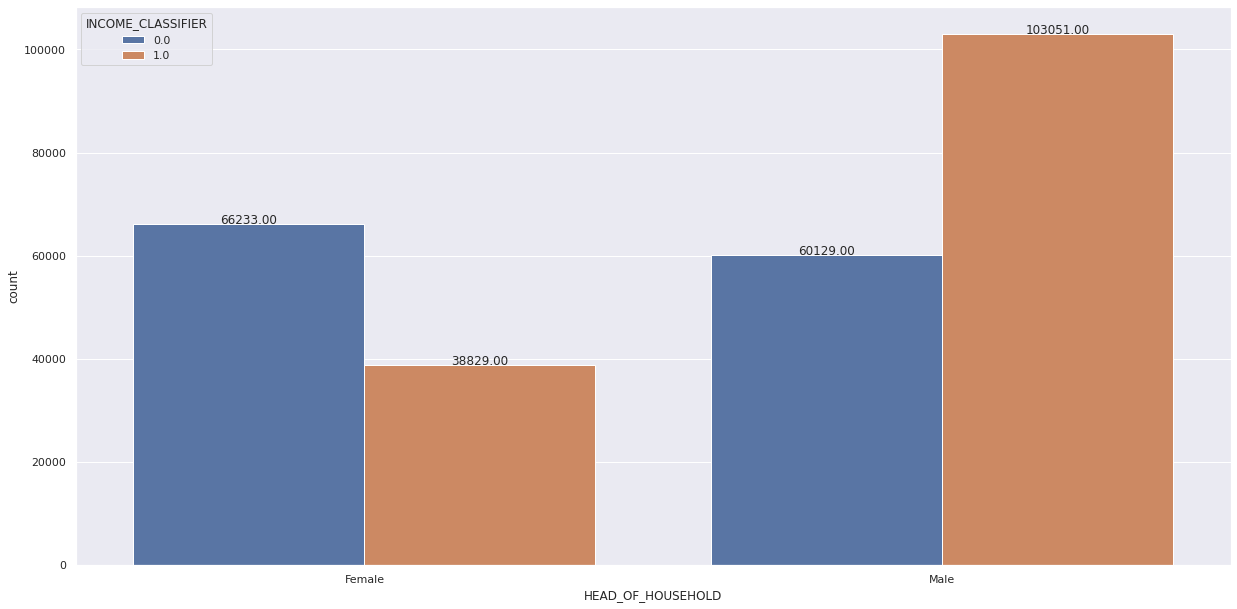

In [ ]:
sns.set(rc={'figure.figsize':(20.7,10.27)})   # for increasing the size of plot 

ax = sns.countplot(x='HEAD_OF_HOUSEHOLD', hue='INCOME_CLASSIFIER', data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height),
            ha="center") 

**Notes**

1) Most of families have men as there as there family head.
 
2) If a family has there family head as male than they are more likely to have a good economic status

**3.7 Exploring the data of family size**

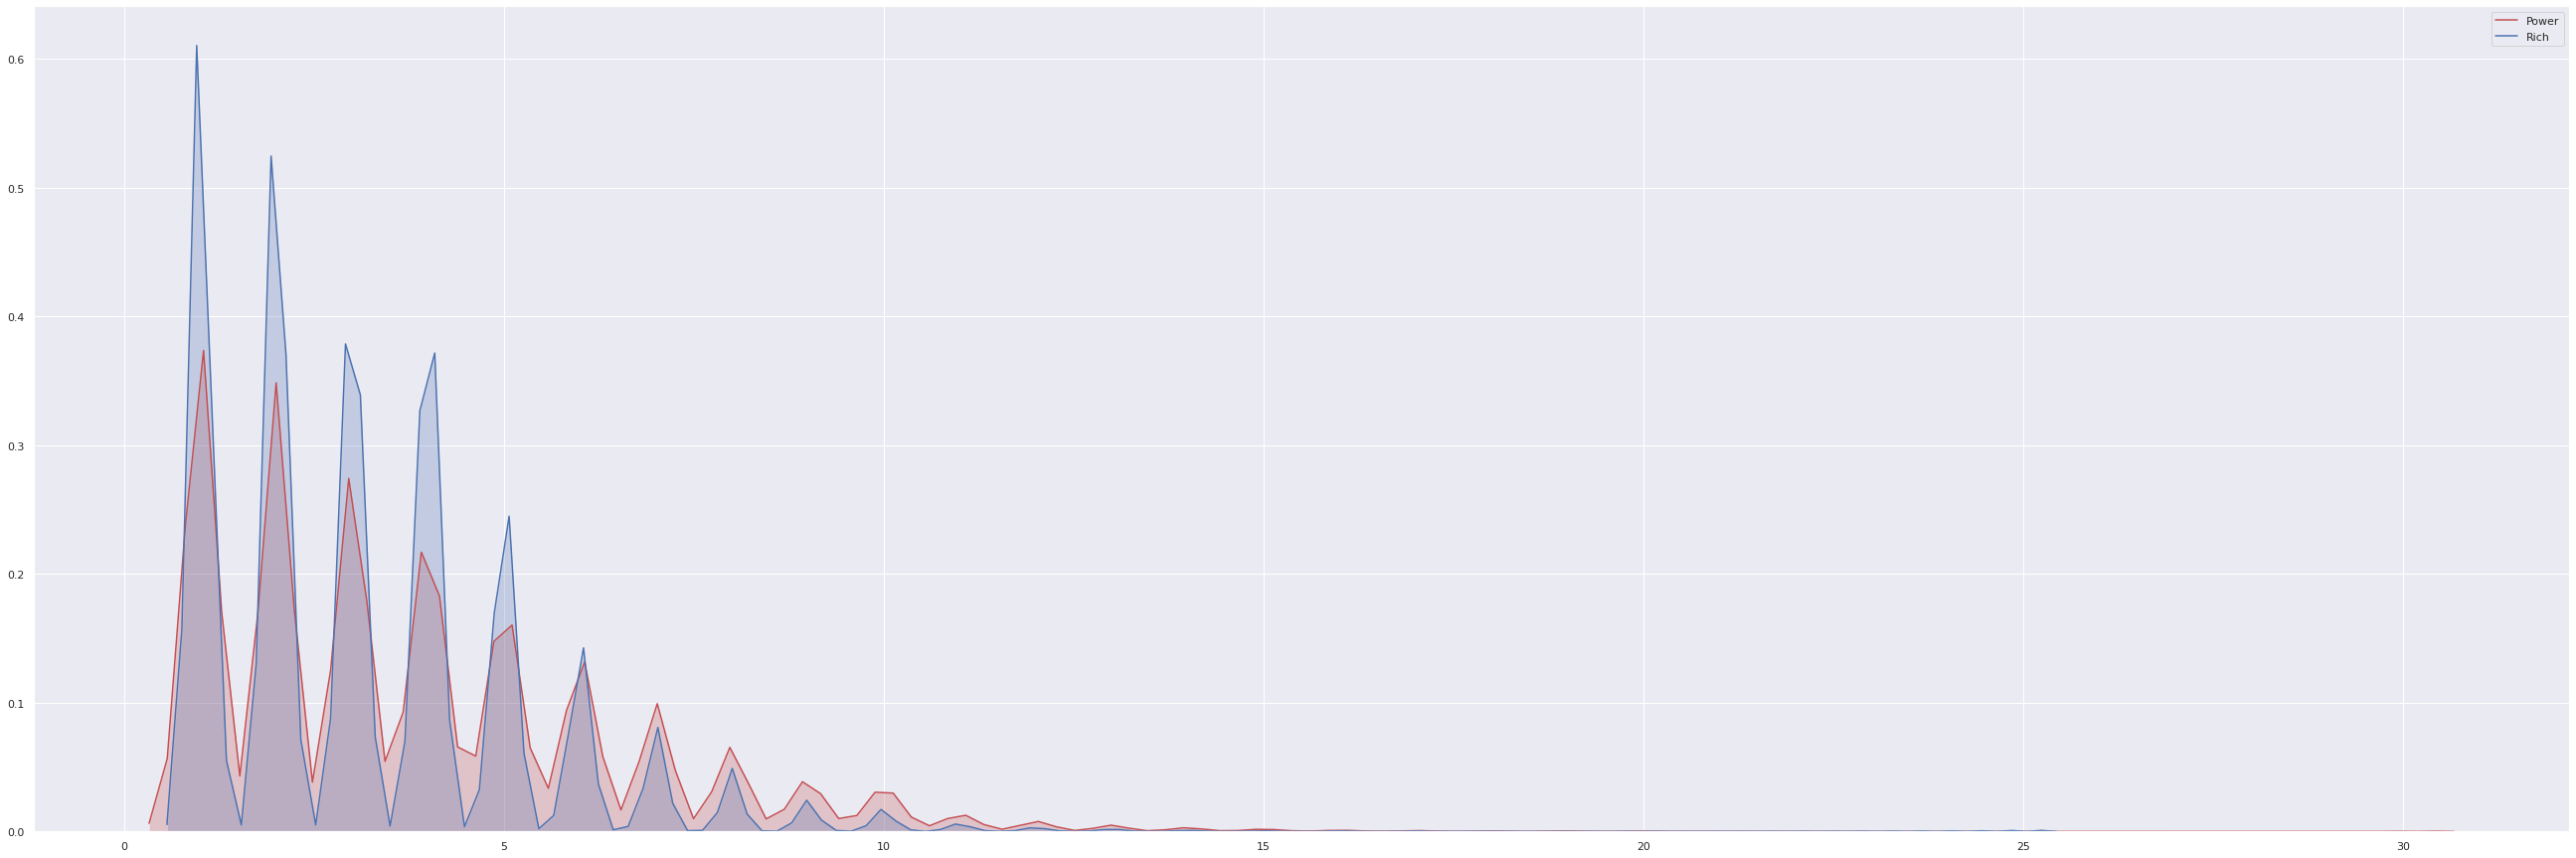

In [ ]:
sns.set(rc={'figure.figsize':(45.7,15.27)})
sns.kdeplot(data.loc[(data['INCOME_CLASSIFIER']==0),'HOUSE_HOLD_SIZE'],color='r',shade=True,label='Power')
sns.kdeplot(data.loc[(data['INCOME_CLASSIFIER']==1),'HOUSE_HOLD_SIZE'],color='b',shade=True,label='Rich')

**NOTES** 

1) If the family size is small than it is more chance that is economical active 

2) the family with size more than 11 are very less and there behavior are siimilar so mix them 

In [ ]:
l =[18,60,89,278,176914,176928,176962,249675,249691]
for i in range (len(data)) :
  if i not in l :
    if data['HOUSE_HOLD_SIZE'][i] > 11 :
      data['HOUSE_HOLD_SIZE'][i] = 11

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


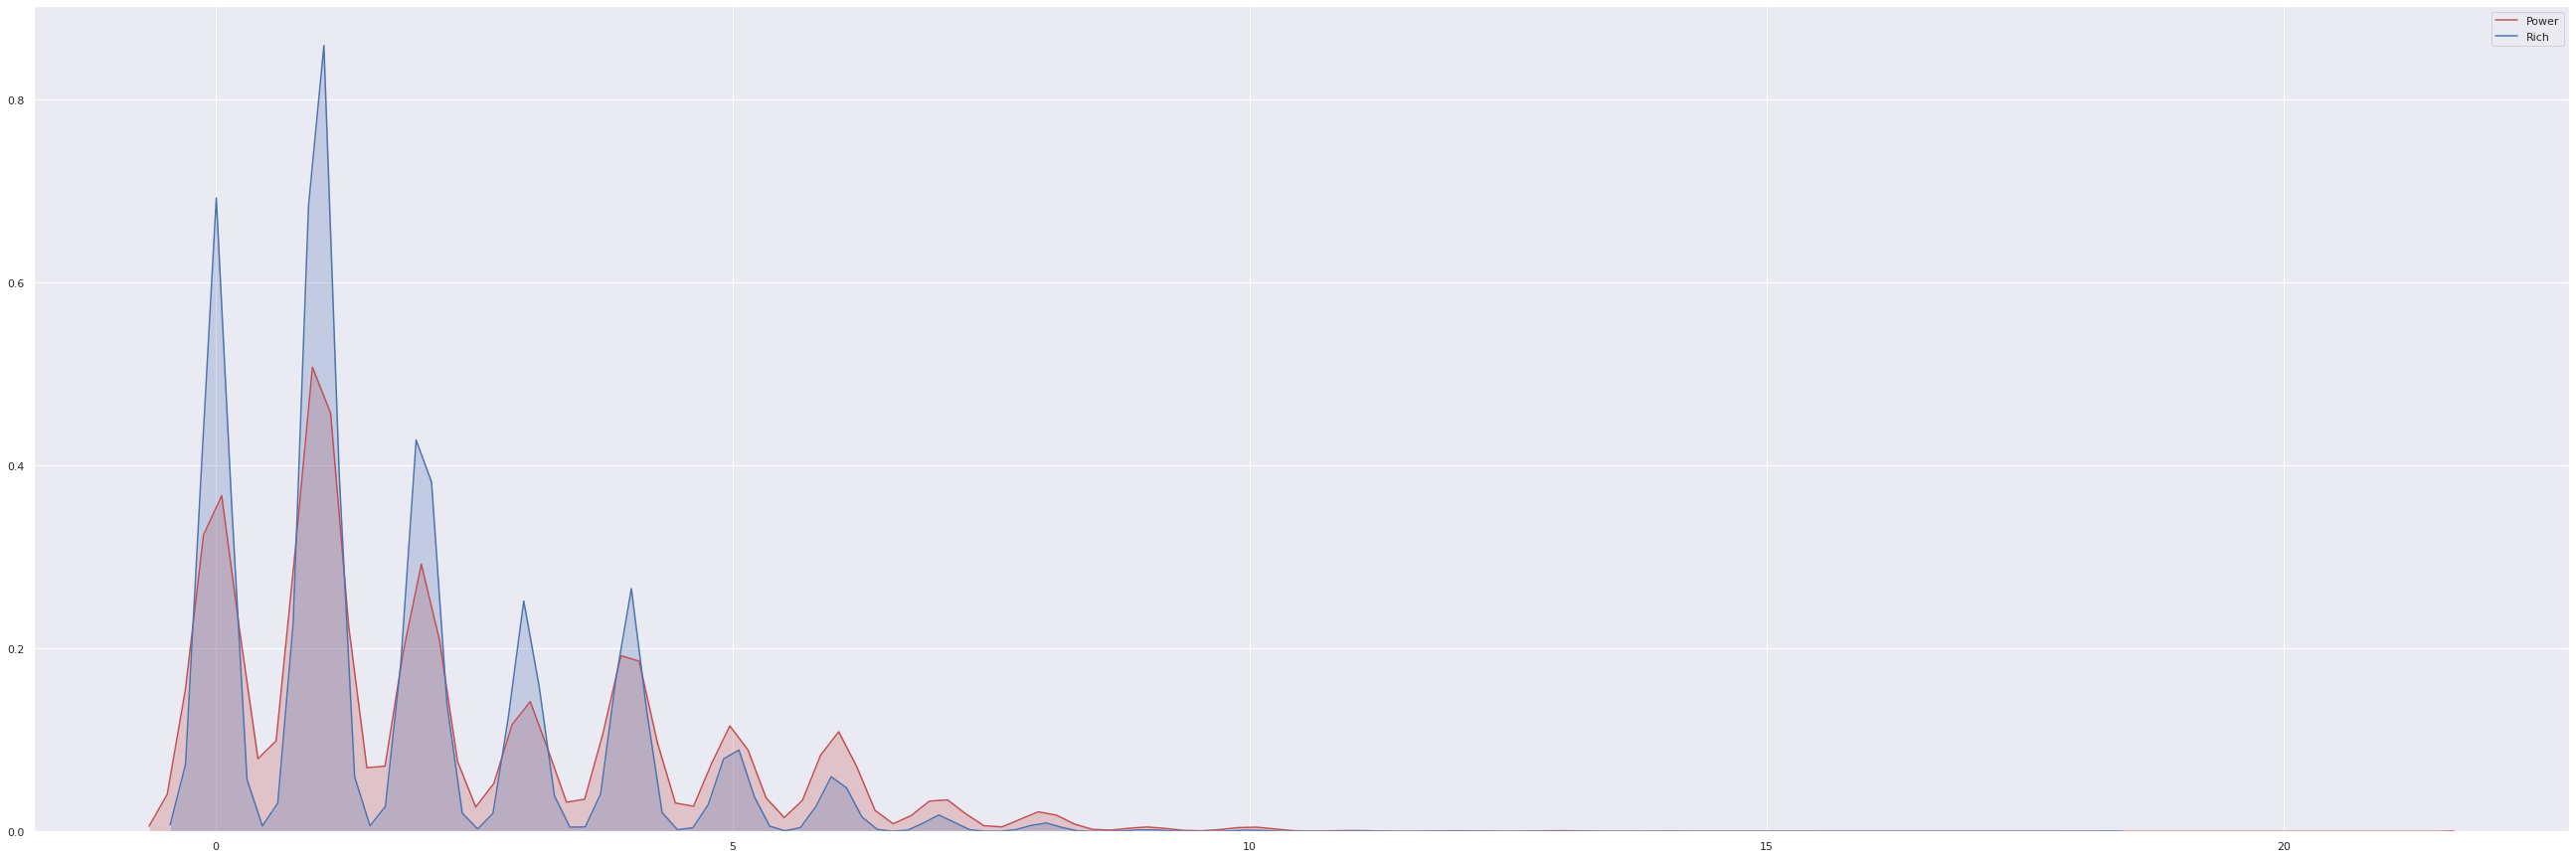

In [ ]:
sns.set(rc={'figure.figsize':(45.7,15.27)})
sns.kdeplot(data.loc[(data['INCOME_CLASSIFIER']==0),'NUM_CHILD_IN_HOUSEHOLD'],color='r',shade=True,label='Power')
sns.kdeplot(data.loc[(data['INCOME_CLASSIFIER']==1),'NUM_CHILD_IN_HOUSEHOLD'],color='b',shade=True,label='Rich')

**NOTES** 

1) If the family size with less number oof children than it is more chance that is economical active 

2) the family with size more than 8 are very less and there behavior are siimilar so mix them 

In [ ]:
l =[18,60,89,278,176914,176928,176962,249675,249691]
for i in range (len(data)) :
  if i not in l :
    if data['NUM_CHILD_IN_HOUSEHOLD'][i] > 8 :
      data['NUM_CHILD_IN_HOUSEHOLD'][i] = 8

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


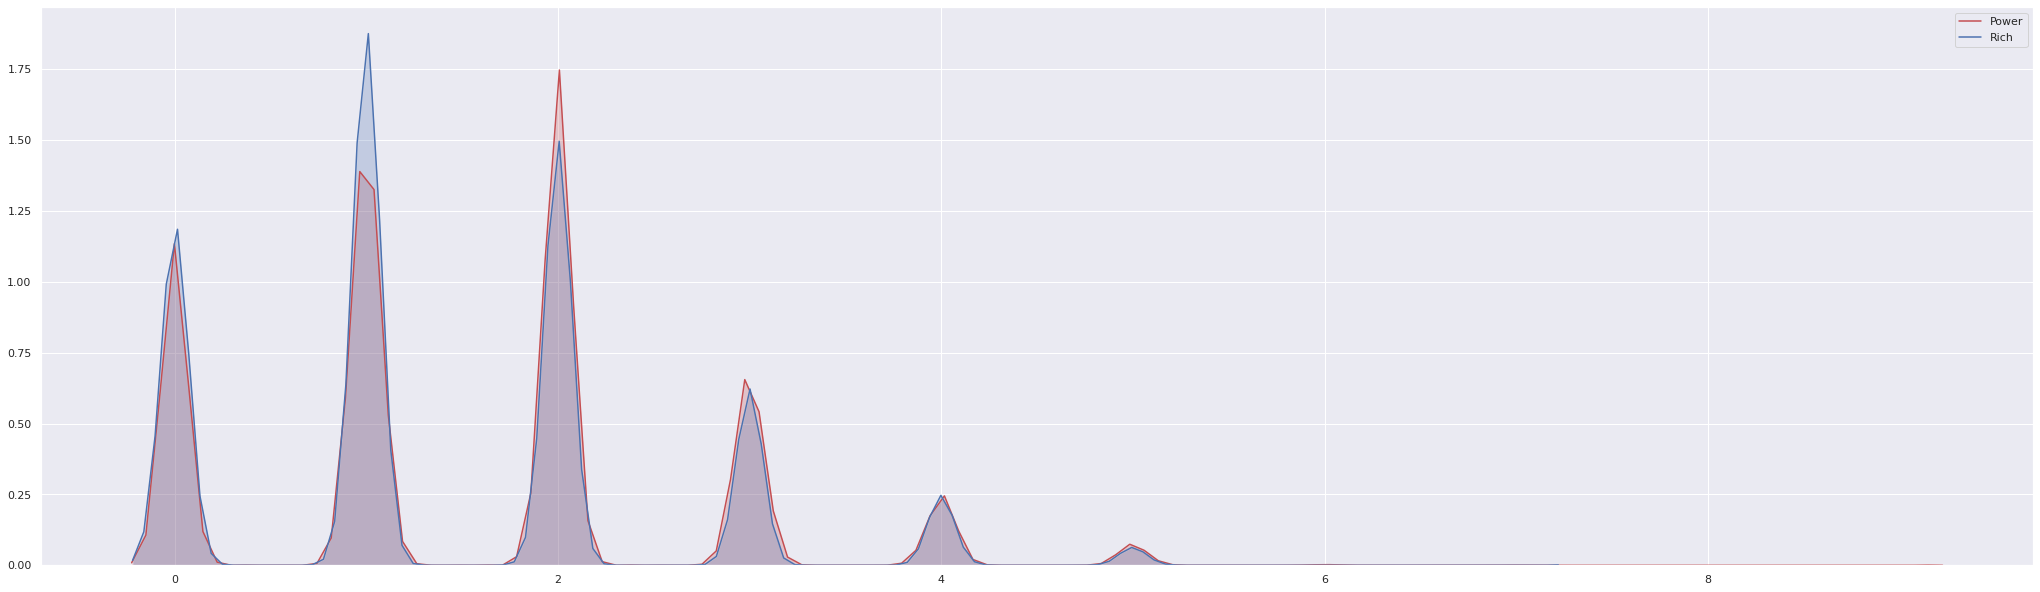

In [ ]:
sns.set(rc={'figure.figsize':(35.7,10.27)})
sns.kdeplot(data.loc[(data['INCOME_CLASSIFIER']==0),'NUM_ADULT_IN_HOUSEHOLD'],color='r',shade=True,label='Power')
sns.kdeplot(data.loc[(data['INCOME_CLASSIFIER']==1),'NUM_ADULT_IN_HOUSEHOLD'],color='b',shade=True,label='Rich')

#**4.0 One Hot Encoding the the catagorical data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268242 entries, 0 to 268250
Data columns (total 16 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   SN_ID                             268242 non-null  float64
 1   TYPE_LIVING_QUARTERS              268242 non-null  object 
 2   TOTAL_NUM_ROOMS                   268242 non-null  float64
 3   TENURE_STATUS_FINAL               268242 non-null  object 
 4   ACCESS_TO_TOILET_FINAL            268242 non-null  object 
 5   ACCESS_TO_PIPE_WATER_FINAL        268242 non-null  object 
 6   INTERNET_ACCESS_FINAL             268242 non-null  object 
 7   AGE_HEAD_OF_HOUSEHOLD             268242 non-null  float64
 8   HEAD_OF_HOUSEHOLD                 268242 non-null  object 
 9   EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL  268242 non-null  object 
 10  HOUSE_HOLD_SIZE                   268242 non-null  float64
 11  NUM_CHILD_IN_HOUSEHOLD            268242 non-null  f

In [ ]:
data = pd.get_dummies(data,columns=['TENURE_STATUS_FINAL','TYPE_LIVING_QUARTERS','ACCESS_TO_TOILET_FINAL','ACCESS_TO_PIPE_WATER_FINAL','INTERNET_ACCESS_FINAL','HEAD_OF_HOUSEHOLD','EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL'],drop_first=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268242 entries, 0 to 268250
Data columns (total 36 columns):
 #   Column                                                                                                           Non-Null Count   Dtype  
---  ------                                                                                                           --------------   -----  
 0   SN_ID                                                                                                            268242 non-null  float64
 1   TOTAL_NUM_ROOMS                                                                                                  268242 non-null  float64
 2   AGE_HEAD_OF_HOUSEHOLD                                                                                            268242 non-null  float64
 3   HOUSE_HOLD_SIZE                                                                                                  268242 non-null  float64
 4   NUM_CHILD_IN_HOUSEHOLD    

In [ ]:
data.head()

,SN_ID,TOTAL_NUM_ROOMS,AGE_HEAD_OF_HOUSEHOLD,HOUSE_HOLD_SIZE,NUM_CHILD_IN_HOUSEHOLD,INCOME_CLASSIFIER,NUM_ADULT_IN_HOUSEHOLD,OWN_COMPUTER_Y,OWN_TV_Y,TENURE_STATUS_FINAL_Other,TENURE_STATUS_FINAL_Owned and fully paid off,TENURE_STATUS_FINAL_Owned but not yet paid off,TENURE_STATUS_FINAL_Rented,TYPE_LIVING_QUARTERS_House,ACCESS_TO_TOILET_FINAL_Chemical toilet,ACCESS_TO_TOILET_FINAL_Flush toilet connected to sewerage system,ACCESS_TO_TOILET_FINAL_Flush toilet with septic tank,ACCESS_TO_TOILET_FINAL_Other,ACCESS_TO_TOILET_FINAL_Pit latrine with ventilation VIP,ACCESS_TO_TOILET_FINAL_Pit latrine without ventilation,ACCESS_TO_TOILET_FINAL_not known,ACCESS_TO_PIPE_WATER_FINAL_Piped tap water inside the dwelling,ACCESS_TO_PIPE_WATER_FINAL_Piped tap water inside the yard,ACCESS_TO_PIPE_WATER_FINAL_Piped tap water on community stand: distance greater than 1000m (1 km) from dwelling,ACCESS_TO_PIPE_WATER_FINAL_Piped tap water on community stand: distance less than 200m from dwelling,ACCESS_TO_PIPE_WATER_FINAL_Piped tap water to community stand: distance less than 200m and 500m from dwelling,ACCESS_TO_PIPE_WATER_FINAL_Piped tap water to community stand: distance less than 500m and 1000m from dwelling,INTERNET_ACCESS_FINAL_From elsewhere,INTERNET_ACCESS_FINAL_From home,INTERNET_ACCESS_FINAL_From work,INTERNET_ACCESS_FINAL_No access to internet,HEAD_OF_HOUSEHOLD_Male,EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL_Employed,EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL_Household head out of working age scope i.e. 15-64,EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL_Not economically active,EMPLOYEMENT_HEAD_HOUSEHOLD_FINAL_Unemployed
0,1.194173e+10,4.0,70.000000,1.0,0.0,1.0,1.0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1.112072e+10,6.0,47.822531,6.0,4.0,0.0,2.0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1.050598e+10,5.0,74.000000,3.0,2.0,1.0,1.0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,1.019185e+10,2.0,31.000000,3.0,1.0,1.0,2.0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,0
4,1.198568e+10,2.0,39.000000,3.0,1.0,0.0,2.0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268242 entries, 0 to 268250
Data columns (total 36 columns):
 #   Column                                                                                                           Non-Null Count   Dtype  
---  ------                                                                                                           --------------   -----  
 0   SN_ID                                                                                                            268242 non-null  float64
 1   TOTAL_NUM_ROOMS                                                                                                  268242 non-null  float64
 2   AGE_HEAD_OF_HOUSEHOLD                                                                                            268242 non-null  float64
 3   HOUSE_HOLD_SIZE                                                                                                  268242 non-null  float64
 4   NUM_CHILD_IN_HOUSEHOLD    

# **5.0 Spliting the data set into the train and test set**

In [ ]:
y = data.iloc[:,5:6].values
data  = data.drop(labels='INCOME_CLASSIFIER' , axis=1)
id = data['SN_ID'] 
data  = data.drop(labels='SN_ID' , axis=1)
X = data.iloc[:,:].values

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 268242 entries, 0 to 268250
Data columns (total 34 columns):
 #   Column                                                                                                           Non-Null Count   Dtype  
---  ------                                                                                                           --------------   -----  
 0   TOTAL_NUM_ROOMS                                                                                                  268242 non-null  float64
 1   AGE_HEAD_OF_HOUSEHOLD                                                                                            268242 non-null  float64
 2   HOUSE_HOLD_SIZE                                                                                                  268242 non-null  float64
 3   NUM_CHILD_IN_HOUSEHOLD                                                                                           268242 non-null  float64
 4   NUM_ADULT_IN_HOUSEHOLD    

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [ ]:
print(len(X_test))

26825


# **6.0 Creating Modeles**

**6.1 Logisitic Regression**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train)
X_test1 = sc.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
classifier1 = LogisticRegression(penalty = 'l2',max_iter=200,random_state=2)
classifier1.fit(X_train1, y_train)

# Predicting the Test set results
y_pred1 = classifier1.predict(X_test1)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 9451  3198]
 [ 2503 11673]]


---

**NOTES**

the accuracy of logistic regression is 78.75% 

---



**6.2 K-NN classifier**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train2 = sc.fit_transform(X_train)
X_test2 = sc.transform(X_test)


In [ ]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2)
classifier.fit(X_train2, y_train)

# Predicting the Test set results
y_pred2 = classifier.predict(X_test2)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred2)
print(cm)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


[[ 9763  2886]
 [ 3109 11067]]



**NOTES**

the accuracy of KNN is 77.65%

**6.4 Navie Bayes**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train4 = sc.fit_transform(X_train)
X_test4 = sc.transform(X_test)


In [ ]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train4, y_train)

# Predicting the Test set results
y_pred4 = classifier.predict(X_test4)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred4)
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 8748  3901]
 [ 2731 11445]]



**NOTES**

the accuracy of Navie bayes is 75.27%

**6.5 Random Forest Classifier**

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train5 = sc.fit_transform(X_train)
X_test5 = sc.transform(X_test)

In [ ]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 100, random_state = 1,criterion='entropy')
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


[[ 9460  3189]
 [ 3052 11124]]



**NOTES**

the accuracy of Random Forest is 76.73%

**6.6 XgBoost**

In [ ]:
# Training XGBoost on the Training set
from xgboost import XGBClassifier
classifier = XGBClassifier(max_depth=8)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[ 9423  3226]
 [ 2265 11911]]



**NOTES**

the accuracy of xg boost is  is 79.53%